In [1]:
import mysql.connector
from mysql.connector import errorcode
import psycopg2 as pg

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, OldScalarFormatter
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
#from matplotlib.finance import candlestick_ohlc, quotes_historical_yahoo_ohlc
import matplotlib.ticker as plticker
%matplotlib inline


DATABASE = 'prodcopy'

if DATABASE == 'prod':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-primary-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '3306',
      'database': 'intelligenttrading_primary',
      'raise_on_warnings': True,
    }
    try:
      db_connection = mysql.connector.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
        
elif DATABASE == 'stage':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-postgres-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '5432',
      'dbname': 'primary_postgres'
    }

    try:
      db_connection = pg.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
        
elif DATABASE == 'prodcopy':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'prodclone.caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '3306',
      'database': 'intelligenttrading_primary',
      'raise_on_warnings': True,
    }

    try:
      db_connection = mysql.connector.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
    


In [2]:
transaction_coin = 'ETH'
counter_coin = 0
resample_period = 1440
records = 100

In [279]:
query = " SELECT * FROM indicator_eventslogical WHERE \
transaction_currency='%s' AND counter_currency=%d AND resample_period=%d  " % (transaction_coin, counter_coin, resample_period)

query = " SELECT * FROM indicator_eventslogical"
log_events_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
log_events_df['timestamp'] = pd.to_datetime(log_events_df['timestamp'], unit='s')
log_events_df.index = pd.DatetimeIndex(log_events_df.timestamp)
log_events_df.sort_index(inplace=True)

log_events_df.to_csv("logical_events.csv")
log_events_df


,id,source,counter_currency,transaction_currency,timestamp,resample_period,event_name,event_value
timestamp,,,,,,,,
2018-01-30 08:44:54.497020,1,0,2,XMR,2018-01-30 08:44:54.497020,60,kumo_breakout_down_signal,1
2018-01-30 08:44:54.497020,2,0,2,ZEC,2018-01-30 08:44:54.497020,60,kumo_breakout_down_signal,1
2018-01-30 08:44:54.497020,3,0,0,OMG,2018-01-30 08:44:54.497020,60,kumo_breakout_up_signal,1
2018-01-30 11:09:54.758980,4,0,2,BTC,2018-01-30 11:09:54.758980,60,kumo_breakout_down_signal,1
2018-01-30 11:09:54.758980,5,0,2,XMR,2018-01-30 11:09:54.758980,60,kumo_breakout_down_signal,1
2018-01-30 11:09:54.758980,6,0,2,DASH,2018-01-30 11:09:54.758980,60,kumo_breakout_down_signal,1
2018-01-30 15:48:15.635950,7,0,2,BTC,2018-01-30 15:48:15.635950,60,kumo_breakout_down_signal,1
2018-01-30 15:48:15.635950,8,0,2,LTC,2018-01-30 15:48:15.635950,60,kumo_breakout_down_signal,1
2018-01-30 15:48:15.635950,9,0,0,XEM,2018-01-30 15:48:15.635950,60,kumo_breakout_down_signal,1


In [9]:
query = " SELECT * FROM signal_signal WHERE \
transaction_currency='%s' AND counter_currency=%d " % (transaction_coin, counter_coin)
#query = " SELECT * FROM signal_signal"
signals_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
signals_df['timestamp'] = pd.to_datetime(signals_df['timestamp'], unit='s')
signals_df.index = pd.DatetimeIndex(signals_df.timestamp)
signals_df.sort_index(inplace=True)


In [6]:
signals_df.tail(50)

,id,created_at,modified_at,UI,subscribers_only,text,source,transaction_currency,signal,trend,...,price_change,volume_btc,volume_btc_change,volume_usdt,volume_usdt_change,sent_at,timestamp,rsi_value,counter_currency,resample_period
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-03-29 00:00:00,97164,2018-03-29 00:03:37.855321,2018-03-29 00:03:37.968623,0,1,,0,ETH,RSI_Cumulative,-1,...,-0.022494,None,None,None,None,1.522282e+09,2018-03-29 00:00:00,21.789537,0,240
2018-03-29 04:00:00,97258,2018-03-29 04:02:16.130117,2018-03-29 04:02:16.230462,0,1,,0,ETH,RSI,-1,...,-0.022087,None,None,None,None,1.522296e+09,2018-03-29 04:00:00,20.056584,0,240
2018-03-29 04:00:00,97259,2018-03-29 04:02:18.058167,2018-03-29 04:02:18.152151,0,1,,0,ETH,RSI_Cumulative,-1,...,-0.022087,None,None,None,None,1.522296e+09,2018-03-29 04:00:00,20.056584,0,240
2018-03-29 06:00:00,97328,2018-03-29 06:03:29.848022,2018-03-29 06:03:29.950343,0,1,,0,ETH,RSI,-1,...,-0.031471,None,None,None,None,1.522303e+09,2018-03-29 06:00:00,26.573915,0,60
2018-03-29 07:00:00,97359,2018-03-29 07:03:08.427274,2018-03-29 07:03:08.539795,0,1,,0,ETH,RSI,-1,...,-0.045025,None,None,None,None,1.522307e+09,2018-03-29 07:00:00,25.113029,0,60
2018-03-29 08:00:00,97390,2018-03-29 08:02:20.453903,2018-03-29 08:02:20.571666,0,1,,0,ETH,RSI,-1,...,-0.045734,None,None,None,None,1.522311e+09,2018-03-29 08:00:00,19.468457,0,240
2018-03-29 08:00:00,97391,2018-03-29 08:02:27.847046,2018-03-29 08:02:27.945364,0,1,,0,ETH,RSI_Cumulative,-1,...,-0.045734,None,None,None,None,1.522311e+09,2018-03-29 08:00:00,19.468457,0,240
2018-03-29 08:00:00,97392,2018-03-29 08:02:40.388008,2018-03-29 08:02:40.491975,0,1,,0,ETH,RSI,-1,...,-0.045734,None,None,None,None,1.522311e+09,2018-03-29 08:00:00,23.151977,0,60
2018-03-29 08:00:00,97393,2018-03-29 08:02:42.504927,2018-03-29 08:02:42.610526,0,1,,0,ETH,RSI_Cumulative,-1,...,-0.045734,None,None,None,None,1.522311e+09,2018-03-29 08:00:00,23.151977,0,60


In [247]:
query = " SELECT * FROM indicator_eventselementary WHERE \
transaction_currency='%s' AND counter_currency=%d AND resample_period=%d  " % (transaction_coin, counter_coin, resample_period)

#query = " SELECT * FROM indicator_eventselementary"

elem_events_df = pd.read_sql(query, con=db_connection)


# make index a timestamp relative_strength
elem_events_df['timestamp'] = pd.to_datetime(elem_events_df['timestamp'], unit='s')
elem_events_df.index = pd.DatetimeIndex(elem_events_df.timestamp)
elem_events_df.sort_index(inplace=True)
elem_events_df.to_csv("simple_elementary_events.csv")
elem_events_df.tail(7)

,id,source,counter_currency,transaction_currency,timestamp,resample_period,event_name,event_value,event_second_value
timestamp,,,,,,,,,
2018-02-09 07:33:56.843690,76672,0,2,ETH,2018-02-09 07:33:56.843690,1440,conversion_above_base,1,None
2018-02-10 07:55:27.774160,85793,0,2,ETH,2018-02-10 07:55:27.774160,1440,sma50_above_sma200,1,None
2018-02-10 07:55:27.774160,85794,0,2,ETH,2018-02-10 07:55:27.774160,1440,conversion_above_base,1,None
2018-02-11 15:34:41.727490,97579,0,2,ETH,2018-02-11 15:34:41.727490,1440,sma50_above_sma200,1,None
2018-02-11 15:34:41.727490,97580,0,2,ETH,2018-02-11 15:34:41.727490,1440,conversion_above_base,1,None
2018-02-14 18:20:00.000000,125773,0,2,ETH,2018-02-14 18:20:00.000000,1440,sma50_above_sma200,1,None
2018-02-15 19:18:00.000000,135566,0,2,ETH,2018-02-15 19:18:00.000000,1440,sma50_above_sma200,1,None


In [280]:


def sma_calc(sma_period):
    query = " SELECT * FROM indicator_sma WHERE transaction_currency='%s' AND counter_currency=%d \
    and resample_period=%d and sma_period=%d " % (transaction_coin, counter_coin, resample_period, sma_period)
    sma_df = pd.read_sql(query, con=db_connection)

    # make index a timestamp relative_strength
    sma_df['timestamp'] = pd.to_datetime(sma_df['timestamp'], unit='s')
    sma_df.index = pd.DatetimeIndex(sma_df.timestamp)
    return sma_df.tail(records)

sma50 = sma_calc(50)
sma200 = sma_calc(200)


In [281]:

query = (" SELECT * FROM indicator_priceresampl WHERE \
transaction_currency='%s' AND \
counter_currency=%d \
and resample_period=%d " ) % (transaction_coin, counter_coin, resample_period)

resampl_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
resampl_df['timestamp'] = pd.to_datetime(resampl_df['timestamp'], unit='s')
resampl_df.index = pd.DatetimeIndex(resampl_df.timestamp)


resampl_df.sort_index(inplace=True)
res_df = resampl_df.tail(records)
#res_df.tail(10)


In [282]:
str(int(resample_period/60)) + 'H'

'24H'

In [283]:
rule = str(int(resample_period/60)) + 'H'
res_df = res_df[['high_price','low_price','open_price','close_price']].resample(rule=rule).mean().bfill()


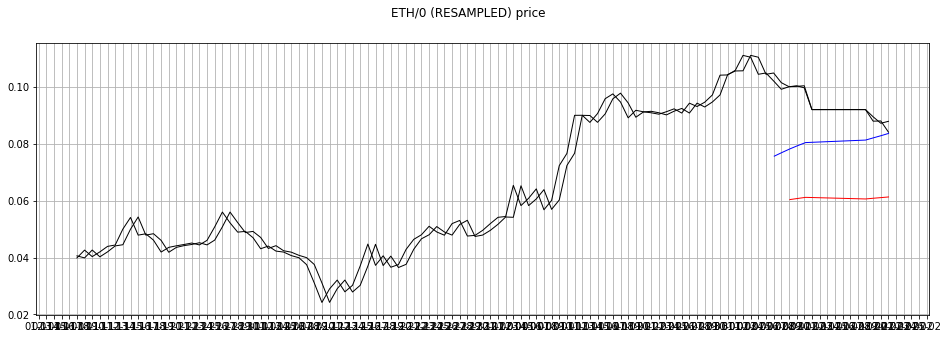

In [284]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
fig.suptitle("%s/%d (RESAMPLED) price" % (transaction_coin, counter_coin))
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m"))

fmt = ScalarFormatter(useOffset=False)
fmt.set_scientific(False)    
ax1.yaxis.set_major_formatter(fmt)

ax1.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)

ax1.plot(res_df.open_price * 10**-8, color='black', linewidth=1)
ax1.plot(res_df.close_price * 10**-8, color='black', linewidth=1)

ax1.plot(sma50.sma_close_price * 10**-8, color='blue', linewidth=1)
ax1.plot(sma200.sma_close_price * 10**-8, color='red', linewidth=1)


plt.show()

In [285]:
sma200.tail(10)

,id,source,counter_currency,transaction_currency,timestamp,resample_period,sma_period,sma_high_price,sma_close_price,sma_midpoint_price
timestamp,,,,,,,,,,
2018-02-05 02:01:09.139440000,89532,0,0,ETH,2018-02-05 02:01:09.139440000,1440,200,NaN,NaN,NaN
2018-02-06 02:29:38.522939999,107433,0,0,ETH,2018-02-06 02:29:38.522939999,1440,200,NaN,NaN,NaN
2018-02-07 02:53:06.816110000,125361,0,0,ETH,2018-02-07 02:53:06.816110000,1440,200,6341522.0,6038445.0,6070043.0
2018-02-08 03:23:54.491640000,144036,0,0,ETH,2018-02-08 03:23:54.491640000,1440,200,6379727.0,6077840.0,6109280.0
2018-02-09 04:04:29.304270000,162774,0,0,ETH,2018-02-09 04:04:29.304270000,1440,200,6416064.0,6116684.0,6146081.0
2018-02-17 00:09:00.000000000,300115,0,0,ETH,2018-02-17 00:09:00.000000000,1440,200,6340668.0,6060349.0,6083630.0
2018-02-18 00:13:00.000000000,312148,0,0,ETH,2018-02-18 00:13:00.000000000,1440,200,6364460.0,6085236.0,6108193.0
2018-02-19 00:23:00.000000000,334027,0,0,ETH,2018-02-19 00:23:00.000000000,1440,200,6386473.0,6107765.0,6131000.0
2018-02-20 00:12:00.000000000,355357,0,0,ETH,2018-02-20 00:12:00.000000000,1440,200,6407943.0,6130495.0,6152352.0


In [159]:
# Ichimoku
ichi_param_1_9 = 20
ichi_param_2_26 = 60
ichi_param_3_52 = 120
displacement = 30



In [160]:
nine_period_high = res_df['high_price'].rolling(window=ichi_param_1_9, center=False).max()
nine_period_low = res_df['low_price'].rolling(window=ichi_param_1_9, center=False).min()
tenkan_sen_conversion = (nine_period_high + nine_period_low) /2
#tenkan_sen_conversion = res_df['midpoint_price'].rolling(window=ichi_param_1_9, center=False, min_periods=4).mean()

twsix_period_high = res_df['high_price'].rolling(window=ichi_param_2_26, center=False,min_periods=45).max()
twsix_period_low = res_df['low_price'].rolling(window=ichi_param_2_26, center=False,min_periods=45).min()
kijun_sen_base = (twsix_period_high + twsix_period_low)/2
#kijun_sen_base = res_df['midpoint_price'].rolling(window=ichi_param_2_26, center=False, min_periods=12).mean()



In [161]:
senkou_span_a_leading = ((tenkan_sen_conversion + kijun_sen_base) / 2).shift(periods=displacement)
                                                                             

In [162]:
period52_high = res_df['high_price'].rolling(window=ichi_param_3_52, center=False,min_periods=45).max()
period52_low = res_df['low_price'].rolling(window=ichi_param_3_52, center=False,min_periods=45).min()
period52 = (period52_high + period52_low)/2
#period52 = res_df['midpoint_price'].rolling(window=ichi_param_3_52, center=False, min_periods=25).mean()

senkou_span_b_leading = period52.shift(periods=displacement)

hikou_span_lagging = res_df['close_price'].shift(-displacement)

# combine everythin into one dataFrame
df = pd.DataFrame({
    'idx_col': res_df['close_price'].index,
    'low': res_df['low_price']* 10**-8,
    'high': res_df['high_price']* 10**-8,
    'open': res_df['open_price'] * 10**-8,
    'close': res_df['close_price']* 10**-8,
    'conversion': tenkan_sen_conversion* 10**-8,
    'base': kijun_sen_base* 10**-8,
    'leading_a': senkou_span_a_leading* 10**-8,
    'leading_b': senkou_span_b_leading* 10**-8,
    'lagging': hikou_span_lagging* 10**-8
})
df['closing_cloud_breakout_up'] = np.sign(
            res_df.close_price - pd.concat([senkou_span_a_leading, senkou_span_b_leading], axis=1).max(axis=1)
        ).diff().fillna(0).gt(0)

df['close_cloud_breakout_up_ext'] = df['closing_cloud_breakout_up'] | \
                                           df['closing_cloud_breakout_up'].shift(1)
    
df['lagging_below_cloud'] = np.where(
            ((df.lagging.shift(displacement) < df.leading_a.shift(displacement)) &
             (df.lagging.shift(displacement) < df.leading_b.shift(displacement))),
            1, 0)
df['lagging_below_cloud'] = df['lagging_below_cloud'].shift(displacement)

df['lagging_below_lowest'] = np.where(df.lagging.shift(displacement) < df.low.shift(displacement), 1, 0)
df['lagging_below_lowest'] = df['lagging_below_lowest'].shift(displacement)

df['conversion_above_base'] = np.where(df.conversion > df.base, 1, 0)
df['conversion_below_base'] = np.where(df.conversion < df.base, 1, 0)


#df.tail(2)

In [163]:

df['closing_above_cloud'] = np.where(((df.close > df.leading_a) & (df.close > df.leading_b)), 1, 0)
df['closing_below_cloud'] = np.where(((df.close < df.leading_a) & (df.close < df.leading_b)), 1, 0)


In [164]:
df['close_cloud_breakout_down'] = np.sign(
            df.close - pd.concat([df.leading_a, df.leading_b], axis=1).min(axis=1)
        ).diff().fillna(0).lt(0)
df['close_cloud_breakout_down_ext'] = df['close_cloud_breakout_down'] |\
                                    df['close_cloud_breakout_down'].shift(1)



df['kumo_breakout_down_rules'] = np.where(
                (df.close_cloud_breakout_down_ext &
                 df.lagging_below_cloud &
                 df.lagging_below_lowest &
                 df.conversion_below_base
                 ) == True,
                1, 0)


In [165]:
#df[df.close_cloud_breakout_down==True]

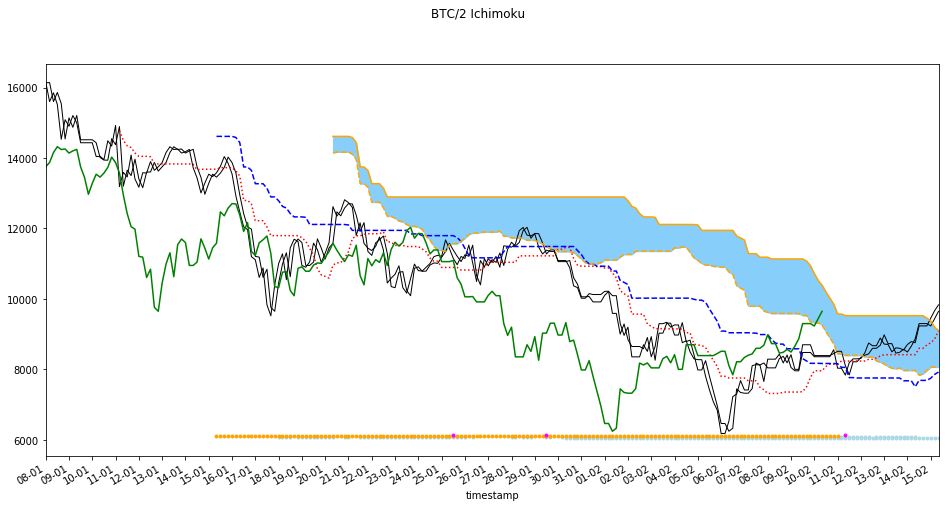

In [166]:




fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
fig.suptitle("%s/%d Ichimoku" % (transaction_coin, counter_coin))
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m"))

fmt = ScalarFormatter(useOffset=False)
fmt.set_scientific(False)    
ax1.yaxis.set_major_formatter(fmt)

ax1.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)

ax1.plot(df.open, color='black', linewidth=1)
ax1.plot(df.close, color='black', linewidth=1)

ax1.plot(df.conversion, linestyle=':', color='red')
ax1.plot(df.base, linestyle='--', color='blue')

ax1.plot(df.leading_a, linestyle='--', color='orange')
ax1.plot(df.leading_b, linestyle='-', color='orange')
ax1.fill_between(df.leading_a.index, df.leading_a, df.leading_b, color='lightskyblue')
ax1.plot(df.lagging, linestyle='-', color='green')

#ax1.plot(df['lagging_below_cloud']*df.close/5, linestyle='-', color='red')
level = np.min(df.close) * 0.97
(df[df.lagging_below_cloud>0].lagging_below_cloud * level).plot(ax=ax1,color='lightblue',style='.')

(df[df.lagging_below_lowest>0].lagging_below_lowest * level *1.005).plot(ax=ax1,color='lightblue',style='.')

(df[df.conversion_below_base>0].conversion_below_base * level *1.01).plot(ax=ax1,color='orange',style='.')

(df[df.close_cloud_breakout_down>0].close_cloud_breakout_down * level *1.015).plot(ax=ax1,color='magenta',style='.')


for time_of_signal in df[df['kumo_breakout_down_rules']==True].index:
        ax1.axvline(time_of_signal, color='red')

plt.show()

# add elementary signals to local and try to debug

